# Final Test-Set Evaluation Notebook (10 points)


- Select the best model (and by best, this also includes its optimal hyperparameters) from the optimization phase and fit it to the entire training set.
- Evaluate it on the test set you had initially put aside.
- Report final results.

REMEMBER: Here is where you must use the test set you put aside in the prerequisite Final Project assignment.

Not evaluating on the correct test set will result in zero points for this part

### Preprocessing

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load the Datasets
train_df = pd.read_csv('../Data/train_lung_cancer.csv')
test_df = pd.read_csv('../Data/test_lung_cancer.csv')

# 2. Preprocessing Function (to ensure consistency)
def preprocess_data(df):
    df = df.copy()
    # Drop target if present (we separate it later)
    if 'LUNG_CANCER' in df.columns:
        y = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
        X = df.drop(columns=['LUNG_CANCER'])
    else:
        y = None
        X = df
        
    # Convert Binary Columns (2 -> 1, 1 -> 0)
    # Note: We exclude AGE and GENDER from this specific replacement
    features_to_fix = [col for col in X.columns if col not in ['AGE', 'GENDER']]
    X[features_to_fix] = X[features_to_fix].replace({1: 0, 2: 1})
    
    # Encode Gender
    X['GENDER'] = X['GENDER'].map({'M': 0, 'F': 1})
    
    return X, y

# Apply Preprocessing
X_train, y_train = preprocess_data(train_df)
X_test, y_test = preprocess_data(test_df)

# 3. Scaling
# Important: Fit the scaler ONLY on Training data, then transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Loaded and Preprocessed successfully.")
print(f"Training Shape: {X_train_scaled.shape}")
print(f"Test Shape: {X_test_scaled.shape}")

Data Loaded and Preprocessed successfully.
Training Shape: (247, 15)
Test Shape: (62, 15)


In [20]:
from sklearn.ensemble import RandomForestClassifier

# SELECT YOUR BEST MODEL HERE

# Option A: Random Forest (Using best params found in Optimization)
final_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, random_state=42)

# Option B: SVM (Uncomment if this was your winner)
# from sklearn.svm import SVC
# final_model = SVC(kernel='linear', random_state=42)

# Option C: Logistic Regression/Lasso (Uncomment if this was your winner)
# from sklearn.linear_model import LogisticRegression
# final_model = LogisticRegression(penalty='l1', solver='liblinear', C=1, class_weight='balanced', random_state=42)

# Option D: Neural Network (Uncomment if this was your winner)
# from sklearn.neural_network import MLPClassifier
# final_model = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', solver='adam', max_iter=500, random_state=42)

# ---------------------------------------------------------
# TRAIN ON FULL TRAINING SET
# ---------------------------------------------------------
print(f"Training {type(final_model).__name__} on full training set...")
final_model.fit(X_train_scaled, y_train)
print("Training Complete.")

Training RandomForestClassifier on full training set...
Training Complete.


FINAL TEST SET ACCURACY: 0.9677

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



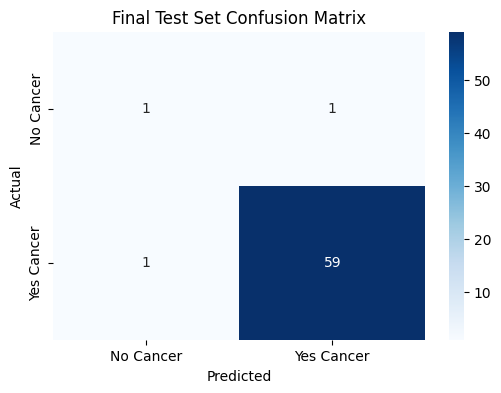

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make Predictions
y_test_pred = final_model.predict(X_test_scaled)

# 2. Calculate Metrics
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# 3. Report Results
print("="*30)
print(f"FINAL TEST SET ACCURACY: {accuracy:.4f}")
print("="*30)

print("\nClassification Report:")
print(class_report)

# 4. Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cancer', 'Yes Cancer'], 
            yticklabels=['No Cancer', 'Yes Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Test Set Confusion Matrix')
plt.show()